# Assignment 4
To complete this assignment, I suggest that you read: <br>
1D_Signal_Processing_Conv_temperature.ipynb <br>
1D_Signal_Processing_Conv_peak.ipynb <br> 
If you understand the above two files, this assignment will be super easy
==============================================================================<br>
The only requirement:  <br>
This ipynb file has 11 code cells. <br>
Do NOT add or remove any cells <br>
A code cell does what it is supposed to do  <br>
For example, cell In [2] is to load data from ecg_data1.csv using pandas  <br>
==============================================================================<br>
Once you complete the file, go to the menu: Kernel -> Restart & Run All, and check the output of each cell

In [66]:
# import the modules in the first cell
%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 8,6

import pandas as pd
import scipy
import scipy.ndimage

Load the ECG data from ecg_data1.csv using pandas <br>
ATTN: this ipynb file of the assignment and the data file ecg_data1.csv should be in the same file folder  <br>
the ECG signal should be stored in a numpy array  <br>
the Sampling Rate is known as 1000Hz  <br>

In [67]:
# load data from ecg_data1.csv using pandas
# Get the 'Amp' volume and convert it to a numpy array x
# write your code here
x = pd.read_csv('ecg_data1.csv')
amp_data = x['Amp'].values
#amp_data


In [68]:
#read but do not modify this section
fs = 1000 # sampling rate (Hz)
Ts = 1/fs # sampling intervel (seconds)
N = amp_data.shape[0] # total number of data points in the ECG signal x
Duration= N*Ts #seconds

Visualize the ECG signal x

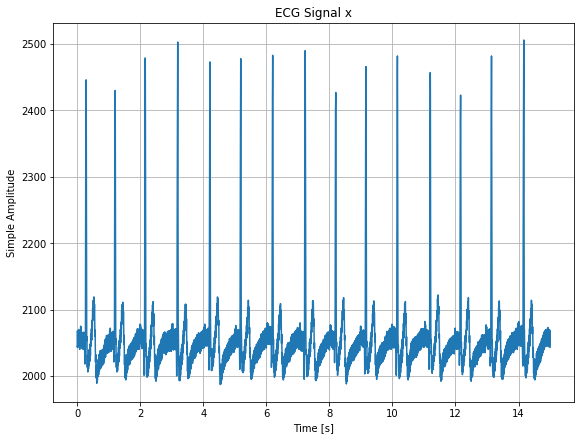

In [69]:
fig, x = plt.subplots(1, 1, constrained_layout=True)
t = np.linspace(0, Duration, N, endpoint = False)
x.plot(t, amp_data, '-')
x.set_xlabel('Time [s]')
x.set_ylabel('Simple Amplitude')
x.set_title('ECG Signal x')
x.grid(True)

Build a GaussianKernel for smoothing the ECG signal x

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


(-0.01, 0.01)

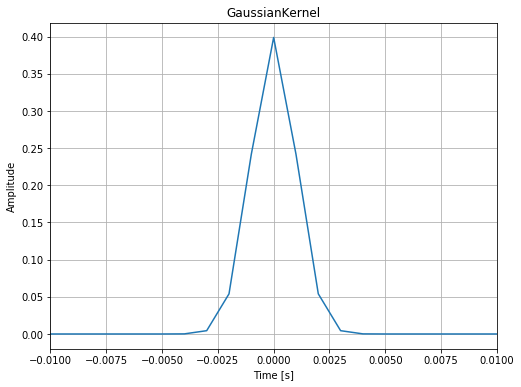

In [70]:
# hint: try to use different sigma
# write your code here
tg = np.linspace(-0.05, 0.05,(0.05+0.05)* fs, endpoint=False,) # an array of timepoints, duration is 0.1 s
sigma=0.001
GaussianKernel = np.exp(-tg**2/(2*sigma**2))
GaussianKernel/=GaussianKernel.sum()
#plot the kernal
fig, x = plt.subplots()
x.plot(tg, GaussianKernel, '-')
x.set_xlabel('Time [s]')
x.set_ylabel('Amplitude')
x.grid(True)
x.set_title('GaussianKernel')
x.set_xlim([-0.01, 0.01])

Smooth the ECG signal x using convolution with GaussianKernel <br>
Visualize the smoothed signal x_smoothed

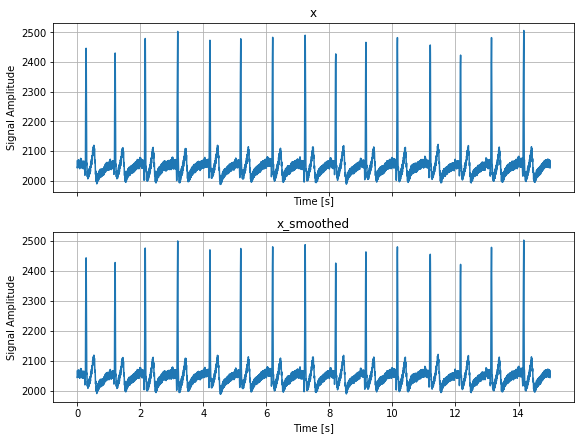

In [71]:
x_smoothed = scipy.ndimage.convolve(amp_data, GaussianKernel, mode='nearest')

fig, x = plt.subplots(2, 1, sharex=True, constrained_layout=True)
x[0].plot(t, amp_data, '-')
x[0].set_xlabel('Time [s]')
x[0].set_ylabel('Signal Amplitude')
x[0].set_title('x')
x[0].grid(True)

x[1].plot(t, x_smoothed, '-')
x[1].set_xlabel('Time [s]')
x[1].set_ylabel('Signal Amplitude')
x[1].set_title('x_smoothed')
x[1].grid(True)

Perform peak detection using two convolution kernals <br>

In [72]:
# in this section, a numpy array PeakIndexArray is obtained
# which stores the indexes of the detected peaks in the ECG signal x
# write your code here
h1 = [-1, 1, 0] # convolution kernel-1 for peak detection
h2 = [0, 1, -1] # convolution kernel-2 for peak detection
y = scipy.ndimage.convolve(x_smoothed, h1, mode='nearest')
z = scipy.ndimage.convolve(x_smoothed, h2, mode='nearest')

IndexArray1 = np.where(y>0)
IndexArray2 = np.where(z>0) #why do we want this greater than -1?
PeakIndexArray = np.intersect1d(IndexArray1, IndexArray2) # find the intersection of IndexArray1 and IndexArray2



Visualize the ECG signal and the detected peaks

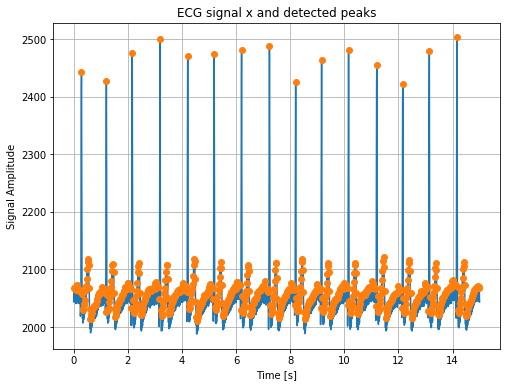

In [77]:
# write your code here
fig, x = plt.subplots()
x.plot(t, x_smoothed, '-')
x.plot(t[PeakIndexArray], x_smoothed[PeakIndexArray], 'o')
x.set_xlabel('Time [s]')
x.set_ylabel('Signal Amplitude')
x.set_title('ECG signal x and detected peaks')
x.grid(True)

We need to find the R-peaks <br>
https://en.wikipedia.org/wiki/Electrocardiography  <br>
Select those peaks with amplitude values > threshold (e.g. 2200) <br>

In [74]:
# hint:
# assume the numpy array PeakIndexArray stores the indexes of the detected peaks in the ECG signal x
# then we can use the function np.where to find the the indexes of the peaks with amplitudes > threshold
# try this: RPeakIndexArray=PeakIndexArray[np.where(x[PeakIndexArray] > threshold)]
# write your code here
h1 = [-1, 1, 0] # convolution kernel-1 for peak detection
h2 = [0, 1, -1] # convolution kernel-2 for peak detection
y = scipy.ndimage.convolve(x_smoothed, h1, mode='nearest')
z = scipy.ndimage.convolve(x_smoothed, h2, mode='nearest')

threshold = 2200
IndexArray1 = np.where(y>0)
IndexArray2 = np.where(z>0) #why do we want this greater than -1?
PeakIndexArray = np.intersect1d(IndexArray1, IndexArray2) # find t
RPeakIndexArray=PeakIndexArray[np.where(amp_data[PeakIndexArray] > threshold)]



Visualize the R-peaks

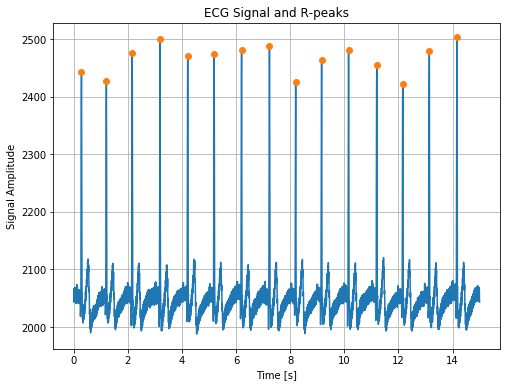

In [78]:
# write your code here
fig, x = plt.subplots()
x.plot(t, x_smoothed, '-')
x.plot(t[RPeakIndexArray], x_smoothed[RPeakIndexArray], 'o')
x.set_xlabel('Time [s]')
x.set_ylabel('Signal Amplitude')
x.set_title('ECG Signal and R-peaks')
x.grid(True)

Calculate heart rate per minute based on the R-wave peaks

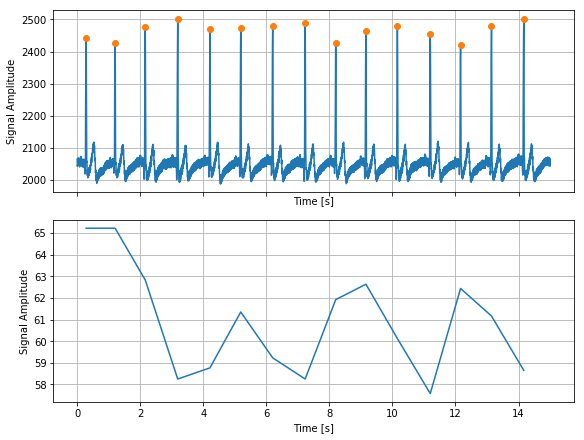

In [79]:
# hint:
# assume the numpy array RPeakIndexArray stores the indexes of the R-peaks in the ECG signal x
# step-1: create a numpy array (google np.zeros) that has the same shape as RPeakIndexArray
# step-2: in a range-based for loop: HeartRate[n]=60*fs/(RPeakIndexArray[n]-RPeakIndexArray[n-1])
#         It should be range(1, RPeakIndexArray.shape[0]), think about why not range(0, RPeakIndexArray.shape[0])
# step-3: set HeartRate[0] to be equal to HeartRate[1]
# step-4: plot the signal x and the HeartRate curve
#         RPeakIndexArray stores the indexes, not timepoints
#         to get the timepoints: RPeakTimeArray = RPeakIndexArray*Ts
# write your code here

HeartRate = np.zeros(RPeakIndexArray.shape)

for n in range(1, RPeakIndexArray.shape[0]):
    HeartRate[n]=60*fs/(RPeakIndexArray[n]-RPeakIndexArray[n-1])

HeartRate[0] = HeartRate[1]

RPeakTimeArray = RPeakIndexArray*Ts




fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True)
ax[0].plot(t, x_smoothed, '-')
ax[0].plot(t[RPeakIndexArray], x_smoothed[RPeakIndexArray], 'o')
ax[0].set_xlabel('Time [s]')

ax[0].set_ylabel('Signal Amplitude')
ax[0].grid(True)
ax[1].plot(t[RPeakIndexArray], HeartRate, '-')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Signal Amplitude')
ax[1].grid(True)